CONVERTING THE IMAGE LABELS FROM YOLO LABEL TO CSV FILE TO EXTRACT THE IMAGE

In [1]:
import numpy as np
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [2]:
path = r'D:\crop and weed detection\agri_data\data'

In [3]:
data = [os.path.join(path,x) for x in os.listdir(path)]


In [4]:
images = [data[x] for x in range(len(data)) if data[x].endswith('.jpeg')]

In [5]:
labels = [data[x] for x in range(len(data)) if data[x].endswith('.txt')]

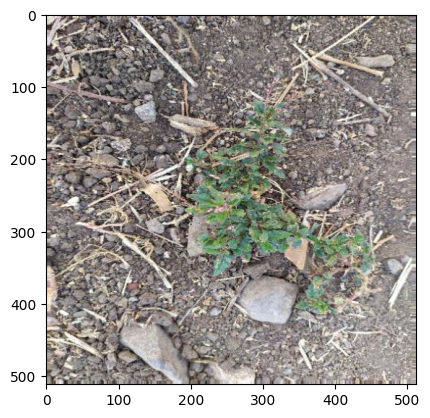

In [6]:
#checking our conversion is working or not
plt.imshow(cv2.cvtColor(cv2.imread(images[0]),cv2.COLOR_BGR2RGB))

In [7]:
df = pd.DataFrame(columns=['image_name','object','x_cen','y_cen','w','h'])
i=0
for id in tqdm(images):
    label = open(id[:-5]+'.txt','r') 
    a = label.read()
    label.close()
    label = a.split('\n')
    cleaned_label = label[:-1]
    
    for name in cleaned_label:
        ind_label = name.split(' ')
        df.loc[i,'image_name'] = id
        df.loc[i,'object'] = int(ind_label[0])
        df.loc[i,'x_cen'] = float(ind_label[1])
        df.loc[i,'y_cen'] = float(ind_label[2])
        df.loc[i,'w'] = float(ind_label[3])
        df.loc[i,'h'] = float(ind_label[4])
        i += 1

100%|██████████| 1300/1300 [00:22<00:00, 58.51it/s]


In [8]:
df.head()

image_name object     x_cen  \
0  D:\crop and weed detection\agri_data\data\agri...      1  0.608398   
1  D:\crop and weed detection\agri_data\data\agri...      1  0.496094   
2  D:\crop and weed detection\agri_data\data\agri...      1  0.445312   
3  D:\crop and weed detection\agri_data\data\agri...      1  0.494141   
4  D:\crop and weed detection\agri_data\data\agri...      1  0.601562   

      y_cen         w         h  
0  0.498047  0.541016   0.53125  
1  0.384766  0.960938  0.753906  
2  0.483398  0.808594  0.634766  
3  0.350586  0.730469  0.611328  
4  0.448242  0.570312  0.595703

In [9]:
df.image_name[0]

'D:\\crop and weed detection\\agri_data\\data\\agri_0_1009.jpeg'

In [10]:
#column name for pascal-voc dataframe
column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']

In [11]:
pascal_voc = pd.DataFrame(columns=column_name)
for i in tqdm(range(len(df))):
    
    pascal_voc.loc[i,'filename'] = df.loc[i,'image_name']
    pascal_voc.loc[i,'width'] = 512
    pascal_voc.loc[i,'height']= 512  
    if df.loc[i,'object'] == 0:    
        pascal_voc.loc[i,'class'] = 'crop'
    else:
        pascal_voc.loc[i,'class'] = 'weed'
    pascal_voc.loc[i,'xmin']  = int((df.loc[i,'x_cen'] - df.loc[i,'w']/2)*512)
    pascal_voc.loc[i,'ymin']  = int((df.loc[i,'y_cen'] - df.loc[i,'h']/2)*512)
    pascal_voc.loc[i,'xmax']  = int((df.loc[i,'x_cen'] + df.loc[i,'w']/2)*512)
    pascal_voc.loc[i,'ymax']  = int((df.loc[i,'y_cen'] + df.loc[i,'h']/2)*512) 

100%|██████████| 2072/2072 [00:19<00:00, 107.49it/s]


In [12]:
pascal_voc

filename width height class  \
0     D:\crop and weed detection\agri_data\data\agri...   512    512  weed   
1     D:\crop and weed detection\agri_data\data\agri...   512    512  weed   
2     D:\crop and weed detection\agri_data\data\agri...   512    512  weed   
3     D:\crop and weed detection\agri_data\data\agri...   512    512  weed   
4     D:\crop and weed detection\agri_data\data\agri...   512    512  weed   
...                                                 ...   ...    ...   ...   
2067  D:\crop and weed detection\agri_data\data\agri...   512    512  weed   
2068  D:\crop and weed detection\agri_data\data\agri...   512    512  weed   
2069  D:\crop and weed detection\agri_data\data\agri...   512    512  weed   
2070  D:\crop and weed detection\agri_data\data\agri...   512    512  weed   
2071  D:\crop and weed detection\agri_data\data\agri...   512    512  weed   

     xmin ymin xmax ymax  
0     172  119  449  391  
1       8    4  500  390  
2      20   84  434  409  
3      66   23  440  336  
4     161   76  453  381  
...   ...  ...  ...  ...  
2067   58   80  455  336  
2068   45  132  228  311  
2069   52  355  227  512  
2070  272   80  458  310  
2071  218  342  313  431  

[2072 rows x 8 columns]

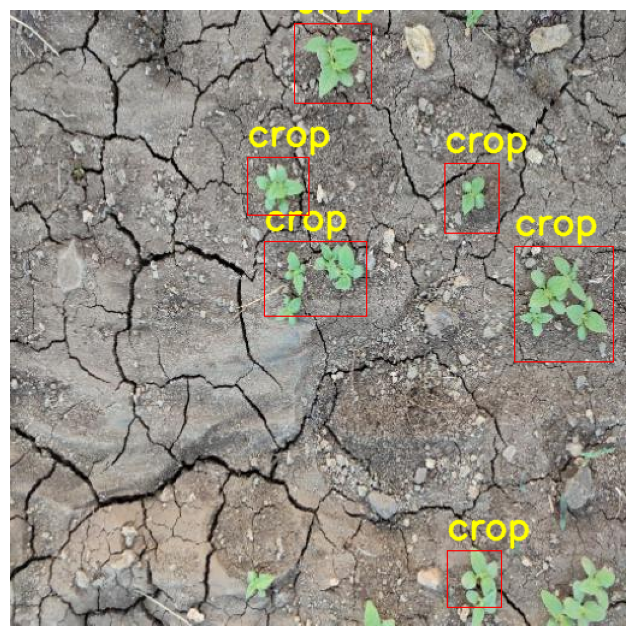

In [13]:
any_index_number = 2001 
test_img = cv2.cvtColor(cv2.imread(pascal_voc.loc[any_index_number,'filename']),cv2.COLOR_BGR2RGB)
test_df = pascal_voc[pascal_voc['filename']==pascal_voc.loc[any_index_number,'filename']].reset_index(drop=True)
for i in range(len(test_df)):
    
    rec = cv2.rectangle(test_img, (test_df.loc[i,'xmin'],test_df.loc[i,'ymin']), (test_df.loc[i,'xmax'],test_df.loc[i,'ymax']), (255,0,0), 1, 1) 
    text = cv2.putText(rec, test_df.loc[i,'class'], (test_df.loc[i,'xmin'],test_df.loc[i,'ymin']-10), cv2.FONT_HERSHEY_SIMPLEX,1, (255,255,0), 2, cv2.LINE_AA)
    
plt.figure(figsize=(8,8))    
plt.imshow(text)
plt.axis('off')
plt.show()

In [14]:
pascal_voc.to_csv('pascal_voc_format.csv',index=False)

In [15]:
df = pd.read_csv(r'pascal_voc_format.csv')

In [16]:
df.head()

filename  width  height class  \
0  D:\crop and weed detection\agri_data\data\agri...    512     512  weed   
1  D:\crop and weed detection\agri_data\data\agri...    512     512  weed   
2  D:\crop and weed detection\agri_data\data\agri...    512     512  weed   
3  D:\crop and weed detection\agri_data\data\agri...    512     512  weed   
4  D:\crop and weed detection\agri_data\data\agri...    512     512  weed   

   xmin  ymin  xmax  ymax  
0   172   119   449   391  
1     8     4   500   390  
2    20    84   434   409  
3    66    23   440   336  
4   161    76   453   381

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2072 non-null   object
 1   width     2072 non-null   int64 
 2   height    2072 non-null   int64 
 3   class     2072 non-null   object
 4   xmin      2072 non-null   int64 
 5   ymin      2072 non-null   int64 
 6   xmax      2072 non-null   int64 
 7   ymax      2072 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 129.6+ KB


16it [00:01, 13.72it/s]


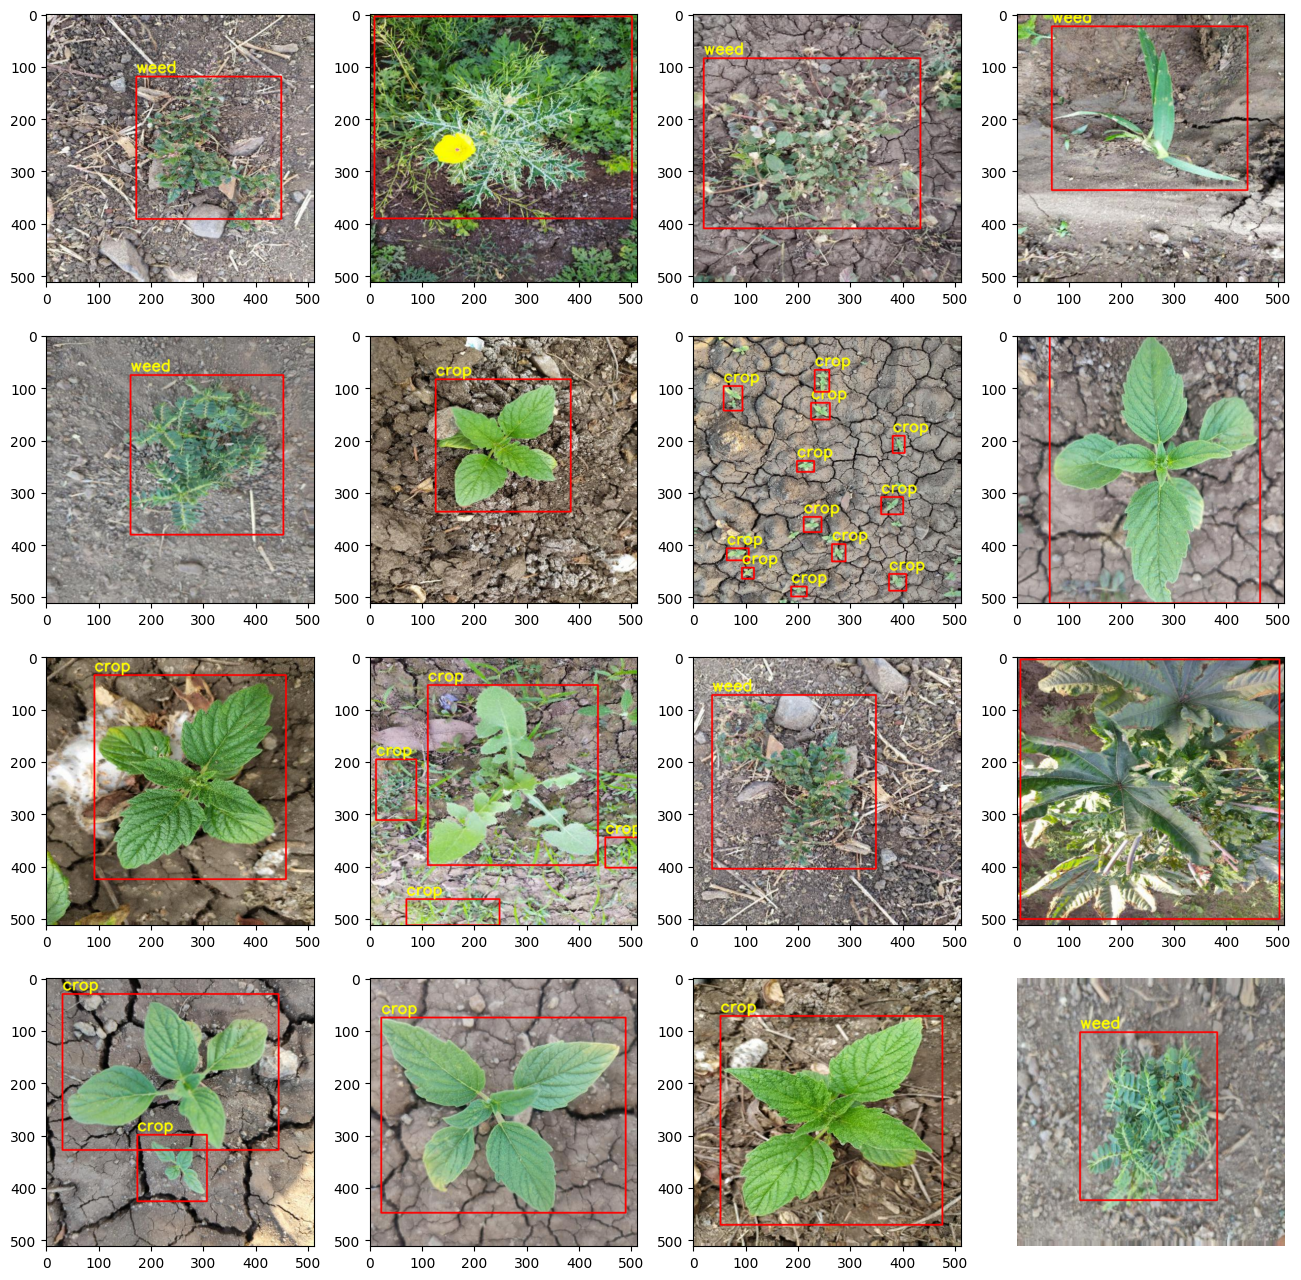

In [18]:
_ , axes = plt.subplots(4,4,figsize=(16,16))
for i,ax in tqdm(zip(range(16),axes.flat)):
    temp_df = df[df['filename']==images[i]].reset_index(drop=True)
    temp_img = cv2.imread(images[i])
    temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB)
    for j in range(len(temp_df)):
        rect = cv2.rectangle(temp_img,(temp_df.loc[j,'xmin'],temp_df.loc[j,'ymin']),(temp_df.loc[j,'xmax'],temp_df.loc[j,'ymax']),(255,0,0),2,cv2.LINE_AA)
        rect_text = cv2.putText(rect,temp_df.loc[j,'class'],(temp_df.loc[j,'xmin'],temp_df.loc[j,'ymin']-8), cv2.FONT_HERSHEY_SIMPLEX,1, (255,255,0), 2, cv2.LINE_AA)
    ax.imshow(rect_text)
    plt.axis('off')

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import tensorflow as tf
from sklearn.utils import shuffle
import cv2
# Access keras module
from tensorflow import keras

In [20]:
def load_samples(csv_file):
    data = pd.read_csv(csv_file)
    data = data[['filename', '0/1']]
    file_names = list(data.iloc[:,0])
    # Get the labels present in the second column
    labels = list(data.iloc[:,1])
    samples=[]
    for samp,lab in zip(file_names,labels):
        samples.append([samp,lab])
    return samples

In [21]:

train_data_path = './train.csv'
train_samples = load_samples(train_data_path)
print(len(train_samples))
validation_data_path='./validation.csv'
validation_samples = load_samples(validation_data_path)
print(len(validation_samples))
test_data_path='./test.csv'
test_samples = load_samples(test_data_path)
print(len(test_samples))

num_train_samples = len(train_samples)
num_validation_samples = len(validation_samples)
num_test_samples = len(test_samples)

1036
518
518


In [22]:
def shuffle_data(data):
    data = shuffle(data)#,random_state=2)
    return data

In [23]:
def train_data_generator(samples, batch_size=32,shuffle_data=True):
    """
    Yields the next training batch.
    Suppose `samples` is an array [[image1_filename,label1], [image2_filename,label2],...].
    """
    num_samples = len(samples)
    while True: # Loop forever so the generator never terminates
        samples = shuffle(samples)

        # Get index to start each batch: [0, batch_size, 2*batch_size, ..., max multiple of batch_size <= num_samples]
        for offset in range(0, num_samples, batch_size):
            # Get the samples you'll use in this batch
            batch_samples = samples[offset:offset+batch_size]

            # Initialise X_train and y_train arrays for this batch
            X_train = []
            y_train = []

            # For each example
            for batch_sample in batch_samples:
                # Load image (X) and label (y)
                img_path = batch_sample[0]
                label = batch_sample[1]
                img =  cv2.imread(img_path)
                img = cv2.resize(img,(150,150)) 
                img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                

                # Add example to arrays
                X_train.append(img)
                y_train.append(label)

            # Make sure they're numpy arrays (as opposed to lists)
            X_train = np.array(X_train)
            y_train = np.array(y_train)

            

            # The generator-y part: yield the next training batch
            yield X_train, y_train

In [24]:
def validation_data_generator(samples, batch_size=32,shuffle_data=True):
    """
    Yields the next training batch.
    Suppose `samples` is an array [[image1_filename,label1], [image2_filename,label2],...].
    """
    num_samples = len(samples)
    while True: # Loop forever so the generator never terminates
        samples = shuffle(samples)

        # Get index to start each batch: [0, batch_size, 2*batch_size, ..., max multiple of batch_size <= num_samples]
        for offset in range(0, num_samples, batch_size):
            # Get the samples you'll use in this batch
            batch_samples = samples[offset:offset+batch_size]

            # Initialise X_train and y_train arrays for this batch
            X_validation = []
            y_validation = []

            # For each example
            for batch_sample in batch_samples:
                # Load image (X) and label (y)
                img_path = batch_sample[0]
                label = batch_sample[1]
                img =  cv2.imread(img_path)
                img = cv2.resize(img,(150,150))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
               

                # Add example to arrays
                X_validation.append(img)
                y_validation.append(label)

            # Make sure they're numpy arrays (as opposed to lists)
            X_validation = np.array(X_validation)
            #y_validation = np.array(y_validation)
            y_validation = np.array(y_validation)

            


            # The generator-y part: yield the next training batch
            yield X_validation, y_validation

In [25]:
def test_data_generator(samples, batch_size=32,shuffle_data=False):
    """
    Yields the next training batch.
    Suppose `samples` is an array [[image1_filename,label1], [image2_filename,label2],...].
    """
    num_samples = len(samples)
    while True: # Loop forever so the generator never terminates
        samples = shuffle(samples)

        # Get index to start each batch: [0, batch_size, 2*batch_size, ..., max multiple of batch_size <= num_samples]
        for offset in range(0, num_samples, batch_size):
            # Get the samples you'll use in this batch
            batch_samples = samples[offset:offset+batch_size]

            # Initialise X_train and y_train arrays for this batch
            X_test = []
            y_test = []

            # For each example
            for batch_sample in batch_samples:
                # Load image (X) and label (y)
                img_path = batch_sample[0]
                label = batch_sample[1]
                img =  cv2.imread(img_path)
#                 if img is None:
#                     continue
                img = cv2.resize(img,(150,150))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                

                # Add example to arrays
                X_test.append(img)
                y_test.append(label)

            # Make sure they're numpy arrays (as opposed to lists)
            X_test = np.array(X_test)
            y_test = np.array(y_test)

            # The generator-y part: yield the next training batch
            yield X_test, y_test

In [36]:
batch_size=32
train_generator=train_data_generator(train_samples,batch_size)
validation_generator = validation_data_generator(validation_samples,batch_size)
test_generator= test_data_generator(test_samples,batch_size)


In [37]:
import keras 
keras.__version__
from keras import layers
from keras import models
from keras import optimizers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150,150,3))) #(3 canales iniciales*32 nodos*3pix*3pix)+32 bias= 896 param
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #(32 nodos posteriores*64 nodos*3pix*3pix)+64 bias= 18496 param
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu')) #(64 nodos posteriores*128 nodos*3pix*3pix)+128 bias= 73856 param
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu')) #(128 nodos posteriores*128 nodos*3pix*3pix)+128 bias= 147584 param
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) #7*7*128 del max pooling anterior
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu')) #(6272 de la capa anterior *512 capa densa)+512 bias = 3211776
model.add(layers.Dense(1, activation='sigmoid')) #(512 capa anterior*4 capa densa)+4 bias = 2052
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 17, 17, 128)      

In [38]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [39]:
history=model.fit(train_generator, epochs=40, steps_per_epoch=len(train_samples)//32, validation_data=validation_generator, validation_steps=len(validation_samples)//32)

Epoch 1/40
32/32 [==============================] - 58s 2s/step - loss: 42.9390 - accuracy: 0.5176 - val_loss: 0.7879 - val_accuracy: 0.4160
Epoch 2/40
32/32 [==============================] - 63s 2s/step - loss: 0.7993 - accuracy: 0.5996 - val_loss: 0.7471 - val_accuracy: 0.4239
Epoch 3/40
32/32 [==============================] - 63s 2s/step - loss: 1.1505 - accuracy: 0.5418 - val_loss: 0.8495 - val_accuracy: 0.5823
Epoch 4/40
32/32 [==============================] - 44s 1s/step - loss: 0.7815 - accuracy: 0.5478 - val_loss: 0.6734 - val_accuracy: 0.5947
Epoch 5/40
32/32 [==============================] - 47s 1s/step - loss: 0.7502 - accuracy: 0.5309 - val_loss: 0.6493 - val_accuracy: 0.5947
Epoch 6/40
32/32 [==============================] - 48s 2s/step - loss: 0.7384 - accuracy: 0.5946 - val_loss: 0.6723 - val_accuracy: 0.5823
Epoch 7/40
32/32 [==============================] - 47s 1s/step - loss: 0.6808 - accuracy: 0.5847 - val_loss: 0.5607 - val_accuracy: 0.6626
Epoch 8/40
32/32 [=

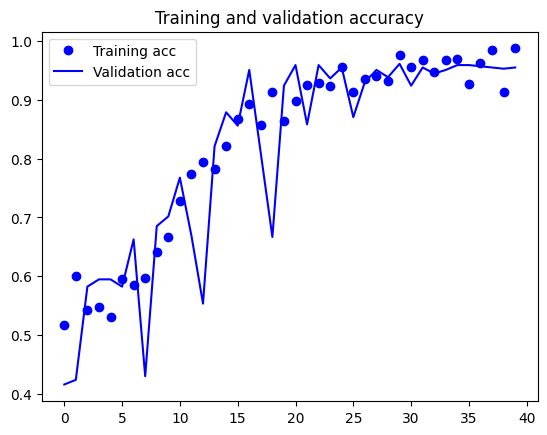

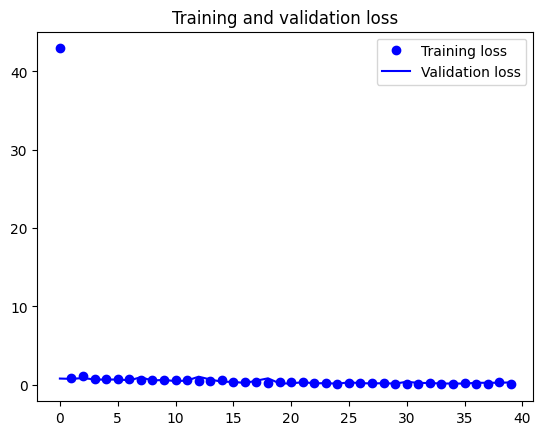

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()